# L1b: Welcome to CHEME 5820 Spring 2026 edition!
In this lab, we'll test our local setup by executing this notebook. Please follow the instructions below to ensure everything is working correctly.

> __Learning Objectives__
> 
> By the end of this lab, you will have verified:
> * __Your Julia and Jupyter environment:__ Confirm that Julia, IJulia, and Jupyter are properly installed and can execute code cells in notebooks.
> * __Custom code workflow:__ Practice editing functions in the `src` directory and loading them via `Include.jl` to understand the course code organization structure.
> * __Data generation and visualization:__ Generate synthetic data from a multivariate normal distribution and create visualizations using plotting packages to verify your computational toolkit is working correctly.


Let's get started!
___

## Setup, Data, and Prerequisites
First, we set up the computational environment by including the `Include.jl` file and loading any needed resources.

> The [`include(...)` command](https://docs.julialang.org/en/v1/base/base/#include) evaluates the contents of the input source file, `Include.jl`, in the notebook's global scope. The `Include.jl` file sets paths, loads required external packages, etc. For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/). 

Let's set up our code environment:

In [1]:
include(joinpath(@__DIR__, "Include.jl")); # include the Include.jl file

In addition to standard Julia libraries, we'll also use [the `VLDataScienceMachineLearningPackage.jl` package](https://github.com/varnerlab/VLDataScienceMachineLearningPackage.jl). Check out [the documentation](https://varnerlab.github.io/VLDataScienceMachineLearningPackage.jl/dev/) for more information on the functions, types, and data used in this material.

___

## Task 1: Test Your Setup with a Helloworld Function
In this task, we'll run a simple function from our custom source (contained in the `/src` directory) to ensure everything is working correctly. 

> __What do I need to do?__ Open [the `greetings(...)` function in `Greetings.jl`](src/Greetings.jl) and locate line 12 where `my_netid = nothing` appears. Change `nothing` to your Cornell netID as a string (e.g., `my_netid = "abc123"`). 

After saving the file, re-run the `Include.jl` cell above (or restart the Kernel, and run all cells) to reload the updated function, and run the cell below. If this works correctly, you should see a personalized greeting message printed below!

In [2]:
greetings() # call the greetings function

ErrorException: Oooops!! Please update the my_netid variable in the greetings() function inside Greetings.jl file before proceeding further.

___

## Task 2: Let's make a two-dimensional Normally distributed data cloud
In this task, let's generate a synthetic dataset that simulates a cloud of points in a two-dimensional space. We'll create points that are normally distributed around the origin with some added noise. 

> __Synthetic Data Model__
> 
> We generate points from a bivariate normal distribution with mean vector $\mathbf{\mu} \in \mathbb{R}^{2}$ and covariance matrix $\mathbf{\Sigma} \in \mathbb{R}^{2 \times 2}$. The correlation parameter $\rho \in [-1, 1]$ controls the linear relationship between the two dimensions. When $\rho = 0$, the dimensions are uncorrelated; when $\rho < 0$, they are negatively correlated; and when $\rho > 0$, they are positively correlated. The covariance matrix structure $\mathbf{\Sigma} = [1.0\, \rho; \rho\, 1.0]$ ensures unit variance in each dimension while introducing the specified correlation.

Let's implement this model [using Julia's `Distributions.jl` package](https://github.com/JuliaStats/Distributions.jl). We'll save the data in the `X::Array{Float64,2}` variable, where each row represents a data point in 2D space.

In [3]:
X = let

    # initialize -
    number_of_points = 10000; # TODO: number of data points to generate, update as needed

    # specify distribution parameters
    μ = [0.1, 2.0]; # mean of the distribution
    ρ = -0.5; # create some correlation between dimensions
    Σ = [1.0 ρ; ρ 1.0]; # TODO: covariance matrix, update as needed
    d = MvNormal(μ, Σ); # define the multivariate normal distribution

    # generate synthetic data
    data = rand(d, number_of_points) |> transpose |> Matrix; # generate points and transpose to get points as rows
end

10000×2 Matrix{Float64}:
  0.253971    1.18796
 -0.737114    3.3862
  1.81176     1.78013
 -1.5704      2.69321
 -1.12566     1.17324
  0.0700652   1.9108
  0.297397    3.16918
 -1.61006     3.7684
 -0.393963    2.52303
  0.0190181   2.47683
  ⋮           
 -0.173832    2.81206
  0.459295    1.32723
 -0.842904    1.60689
  1.40114     1.79721
 -2.16421     4.25657
 -0.00969063  1.95668
 -1.33148     2.94089
 -1.72575     2.81686
  0.320995    2.29722

Let's check to see if our plotting and visualization packages are installed correctly by plotting the generated data.

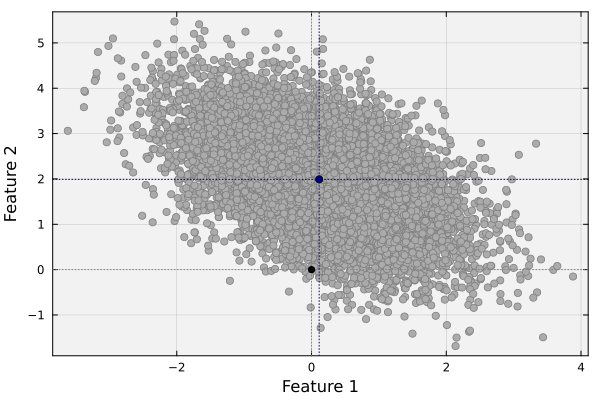

In [6]:
let

    # initialize -
    scatter(X[:,1], X[:,2], label="", c=:gray67,msc=:gray50) # plot the data points

    # plot coordinate axes through the origin
    vline!([0.0], color=:gray, lw=1, ls=:dot, label="")
    hline!([0.0], color=:gray, lw=1, ls=:dot, label="")
    scatter!([0], [0], color=:black, ms=4, label="")

    # overlay the leading eigenvector as an arrow (sign is arbitrary)
    μ = vec(mean(X, dims=1))
    scatter!([μ[1]], [μ[2]], color=:navy, ms=4, label="")
    vline!([μ[1]], color=:navy, lw=1, ls=:dot, label="")
    hline!([μ[2]], color=:navy, lw=1, ls=:dot, label="")

    # background, and labels
    plot!(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
    xlabel!("Feature 1", fontsize=18)
    ylabel!("Feature 2", fontsize=18)
end

If you see a plot here with a cloud of points, then your setup is working correctly!

___

## Summary
This lab verified your local development environment by testing Julia execution, custom code loading from the `src` directory, and data visualization capabilities.

> __Key Takeaways:__
>
> * __Environment setup works:__ Successfully executing this notebook confirms that Julia, IJulia, Jupyter, and required packages are properly installed and configured on your system.
> * __Custom code workflow established:__ Editing functions in the `src` directory and reloading via `Include.jl` demonstrates the course code organization pattern you'll use throughout the semester.
> * __Data generation and visualization functional:__ Creating synthetic datasets from statistical distributions and producing plots verifies your computational toolkit is ready for machine learning tasks.


You are now ready to proceed with the course assignments and labs.
____